## Міні-проєкт: Аналіз оглядів продуктів
### 🎯 Ціль: 
 Завантажити англомовний набір коротких оглядів, очистити текст, провести NLP-обробку і візуалізувати найчастіші слова.

### 📦 Дані:
Візьми невеликий датасет із Kaggle або ж використовуй цей варіант:


In [3]:
import pandas as pd
import numpy as np

data = {
    'review': [
        "I love this phone. The camera quality is amazing!",
        "Battery life is too short. Very disappointed.",
        "Best phone I’ve ever used. Fast and smooth performance.",
        "Worst customer service ever. Will not buy again.",
        "Decent for the price, but nothing special."
    ]
}

df = pd.DataFrame(data)
df


,review
0,I love this phone. The camera quality is amazing!
1,Battery life is too short. Very disappointed.
2,Best phone I’ve ever used. Fast and smooth per...
3,Worst customer service ever. Will not buy again.
4,"Decent for the price, but nothing special."


### 🚀 Кроки:
#### 1. Обробка тексту (NLTK або spaCy):
- Токенізація кожного огляду

- Видалення стоп-слів

- Лематизація

- Побудова списку всіх слів по всіх оглядах

📌 Мета: отримати чистий список лем, без пунктуації та стоп-слів.



In [4]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SuperYanka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df_tokenized = df.copy()
df_tokenized['tokens'] = df['review'].apply(word_tokenize) 
df_tokenized

,review,tokens
0,I love this phone. The camera quality is amazing!,"[I, love, this, phone, ., The, camera, quality..."
1,Battery life is too short. Very disappointed.,"[Battery, life, is, too, short, ., Very, disap..."
2,Best phone I’ve ever used. Fast and smooth per...,"[Best, phone, I, ’, ve, ever, used, ., Fast, a..."
3,Worst customer service ever. Will not buy again.,"[Worst, customer, service, ever, ., Will, not,..."
4,"Decent for the price, but nothing special.","[Decent, for, the, price, ,, but, nothing, spe..."


In [6]:
stop_words = set(stopwords.words('english'))
df_tokenized['tokens'] = df_tokenized['tokens'].apply(lambda tokens: [w for w in tokens if w.lower() not in stop_words])
df_tokenized

,review,tokens
0,I love this phone. The camera quality is amazing!,"[love, phone, ., camera, quality, amazing, !]"
1,Battery life is too short. Very disappointed.,"[Battery, life, short, ., disappointed, .]"
2,Best phone I’ve ever used. Fast and smooth per...,"[Best, phone, ’, ever, used, ., Fast, smooth, ..."
3,Worst customer service ever. Will not buy again.,"[Worst, customer, service, ever, ., buy, .]"
4,"Decent for the price, but nothing special.","[Decent, price, ,, nothing, special, .]"


In [7]:
lemmatizer = WordNetLemmatizer()
df_tokenized['tokens'] = df_tokenized['tokens'].apply(lambda tokens: [lemmatizer.lemmatize(w) for w in tokens])
df_tokenized['tokens'] = df_tokenized['tokens'].apply(lambda tokens: [w for w in tokens if w.isalpha()])

df_tokenized

,review,tokens
0,I love this phone. The camera quality is amazing!,"[love, phone, camera, quality, amazing]"
1,Battery life is too short. Very disappointed.,"[Battery, life, short, disappointed]"
2,Best phone I’ve ever used. Fast and smooth per...,"[Best, phone, ever, used, Fast, smooth, perfor..."
3,Worst customer service ever. Will not buy again.,"[Worst, customer, service, ever, buy]"
4,"Decent for the price, but nothing special.","[Decent, price, nothing, special]"


In [8]:
print(df_tokenized['tokens'])

0              [love, phone, camera, quality, amazing]
1                 [Battery, life, short, disappointed]
2    [Best, phone, ever, used, Fast, smooth, perfor...
3                [Worst, customer, service, ever, buy]
4                    [Decent, price, nothing, special]
Name: tokens, dtype: object


#### 2. Аналіз даних (NumPy + Pandas):
- Порахуй:

  - загальну кількість токенів

  - унікальні слова

  - топ-10 найчастіших слів

- Побудуй нову колонку в df, де буде зберігатися кількість слів в кожному огляді



In [9]:
df_tokenized

,review,tokens
0,I love this phone. The camera quality is amazing!,"[love, phone, camera, quality, amazing]"
1,Battery life is too short. Very disappointed.,"[Battery, life, short, disappointed]"
2,Best phone I’ve ever used. Fast and smooth per...,"[Best, phone, ever, used, Fast, smooth, perfor..."
3,Worst customer service ever. Will not buy again.,"[Worst, customer, service, ever, buy]"
4,"Decent for the price, but nothing special.","[Decent, price, nothing, special]"


In [10]:
all_words = np.sum(df_tokenized['tokens'])
all_words

['love',
 'phone',
 'camera',
 'quality',
 'amazing',
 'Battery',
 'life',
 'short',
 'disappointed',
 'Best',
 'phone',
 'ever',
 'used',
 'Fast',
 'smooth',
 'performance',
 'Worst',
 'customer',
 'service',
 'ever',
 'buy',
 'Decent',
 'price',
 'nothing',
 'special']

In [11]:
counter = 0
for w in all_words:
    counter+= 1
counter

25

In [12]:
df_tokenized["Number of Words (token words)"] = df_tokenized["tokens"].apply(lambda n: len(np.array_split(n, 1)[0]))
df_tokenized

,review,tokens,Number of Words (token words)
0,I love this phone. The camera quality is amazing!,"[love, phone, camera, quality, amazing]",5
1,Battery life is too short. Very disappointed.,"[Battery, life, short, disappointed]",4
2,Best phone I’ve ever used. Fast and smooth per...,"[Best, phone, ever, used, Fast, smooth, perfor...",7
3,Worst customer service ever. Will not buy again.,"[Worst, customer, service, ever, buy]",5
4,"Decent for the price, but nothing special.","[Decent, price, nothing, special]",4


In [13]:
unique_tokens = set(token for tokens in df_tokenized['tokens'] for token in tokens)
unique_tokens = list(unique_tokens)
unique_tokens

['amazing',
 'Decent',
 'quality',
 'performance',
 'phone',
 'ever',
 'Battery',
 'customer',
 'short',
 'Worst',
 'camera',
 'service',
 'disappointed',
 'Best',
 'nothing',
 'Fast',
 'love',
 'special',
 'life',
 'smooth',
 'price',
 'used',
 'buy']

[('phone', 2), ('ever', 2), ('love', 1), ('camera', 1), ('quality', 1), ('amazing', 1), ('Battery', 1), ('life', 1), ('short', 1), ('disappointed', 1)]


<Axes: xlabel='Samples', ylabel='Counts'>

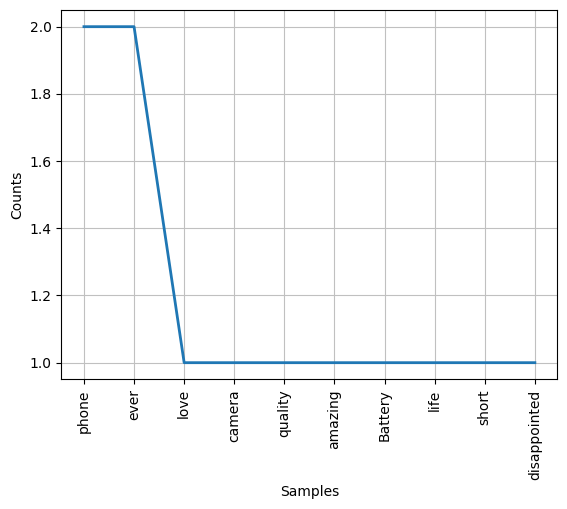

In [14]:
all_words
from nltk import FreqDist
fdist = FreqDist(all_words)
print(fdist.most_common(10))
fdist.plot(10)

In [15]:
df_words = pd.DataFrame(fdist.most_common(), columns=['Word', 'Frequency'])
df_words.head(10)

,Word,Frequency
0,phone,2
1,ever,2
2,love,1
3,camera,1
4,quality,1
5,amazing,1
6,Battery,1
7,life,1
8,short,1
9,disappointed,1


#### 3. Візуалізація (Matplotlib + Seaborn):
- Побудуй гістограму:

  - довжини оглядів (кількість слів)

- Побудуй barplot для топ-10 слів

- Побудуй wordcloud (опціонально, якщо хочеш красиву хмару слів):

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

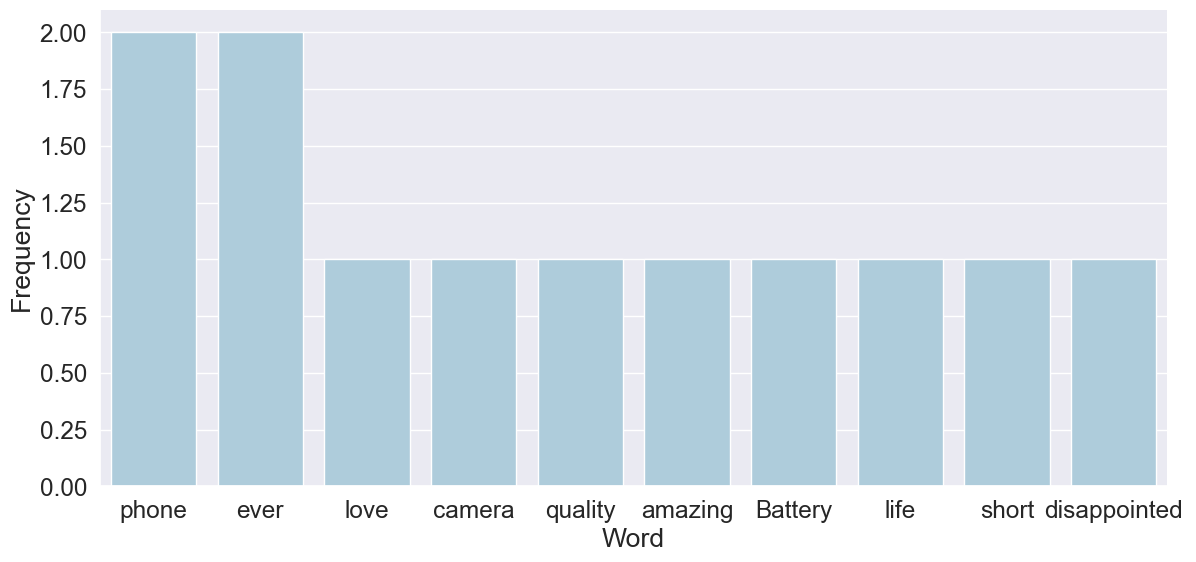

In [17]:
sns.set_theme(font='sans-serif', palette='Paired', font_scale=1.6)
sns.catplot(x='Word', y='Frequency', data=df_words.head(10), kind='bar', height=6, aspect=2)
plt.show()


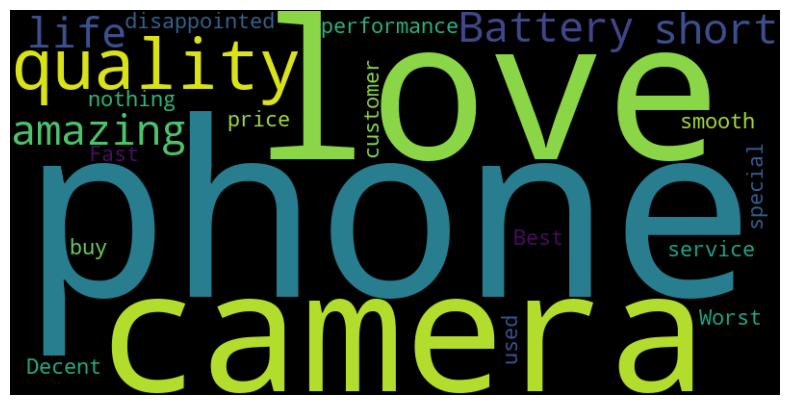

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df_words['Word'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()


#### 4. Бонус — міні-ML: (необов'язково)
- Створи колонку label (0 = негативний, 1 = позитивний), простав її вручну

- Порахуй середню довжину позитивних і негативних оглядів

- Якщо хочеш: порахуй частоту слів по класах і порівняй

In [19]:
df_tokenized

,review,tokens,Number of Words (token words)
0,I love this phone. The camera quality is amazing!,"[love, phone, camera, quality, amazing]",5
1,Battery life is too short. Very disappointed.,"[Battery, life, short, disappointed]",4
2,Best phone I’ve ever used. Fast and smooth per...,"[Best, phone, ever, used, Fast, smooth, perfor...",7
3,Worst customer service ever. Will not buy again.,"[Worst, customer, service, ever, buy]",5
4,"Decent for the price, but nothing special.","[Decent, price, nothing, special]",4


In [20]:
df_tokenized['label'] = [1, 0, 1, 0, 0]
df_tokenized

,review,tokens,Number of Words (token words),label
0,I love this phone. The camera quality is amazing!,"[love, phone, camera, quality, amazing]",5,1
1,Battery life is too short. Very disappointed.,"[Battery, life, short, disappointed]",4,0
2,Best phone I’ve ever used. Fast and smooth per...,"[Best, phone, ever, used, Fast, smooth, perfor...",7,1
3,Worst customer service ever. Will not buy again.,"[Worst, customer, service, ever, buy]",5,0
4,"Decent for the price, but nothing special.","[Decent, price, nothing, special]",4,0


In [21]:
positive_reviews = df_tokenized[df_tokenized['label'] == 1]
negative_reviews = df_tokenized[df_tokenized['label'] == 0]

print("Positive Reviews Mean (Number of Words):", positive_reviews["Number of Words (token words)"].mean())
print("Negative Reviews Mean (Number of Words):", negative_reviews["Number of Words (token words)"].mean())


Positive Reviews Mean (Number of Words): 6.0
Negative Reviews Mean (Number of Words): 4.333333333333333


In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data

{'review': ['I love this phone. The camera quality is amazing!',
  'Battery life is too short. Very disappointed.',
  'Best phone I’ve ever used. Fast and smooth performance.',
  'Worst customer service ever. Will not buy again.',
  'Decent for the price, but nothing special.']}

In [23]:
tokenized_data = []
for d in data['review']:  # Iterate over the list of reviews
    tokens = word_tokenize(d)
    tokenized_data.append(tokens)

sia = SentimentIntensityAnalyzer()
sentiments = []
for tokens in tokenized_data:
    sentiment = sia.polarity_scores(' '.join(tokens))
    if sentiment['compound'] > 0:
        sentiments.append('positive')
    elif sentiment['compound'] < 0:
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

labels = ['positive', 'negative', 'neutral']
y_true = ['positive' if i < 2 else 'negative' if i < 4 else 'neutral' for i in range(len(data['review']))]  # Adjust y_true to match the number of reviews
y_pred = sentiments
accuracy = accuracy_score(y_true, y_pred)
confusion = confusion_matrix(y_true, y_pred, labels=labels)
report = classification_report(y_true, y_pred, labels=labels)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', report)

Accuracy: 0.4
Confusion Matrix:
 [[1 1 0]
 [1 1 0]
 [0 1 0]]
Classification Report:
               precision    recall  f1-score   support

    positive       0.50      0.50      0.50         2
    negative       0.33      0.50      0.40         2
     neutral       0.00      0.00      0.00         1

    accuracy                           0.40         5
   macro avg       0.28      0.33      0.30         5
weighted avg       0.33      0.40      0.36         5



c:\Users\SuperYanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SuperYanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SuperYanka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

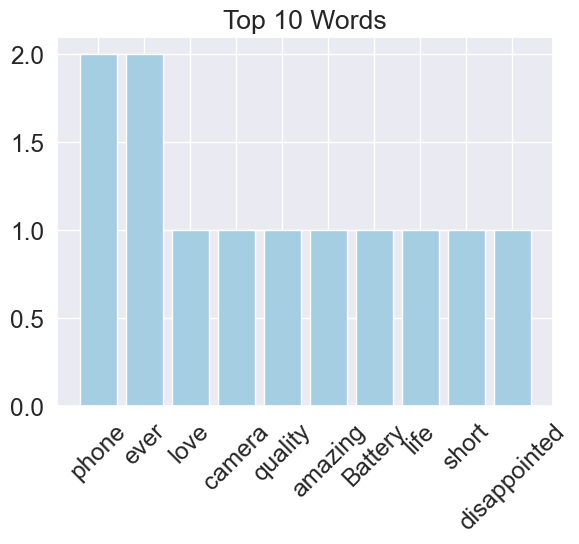

In [24]:
from collections import Counter
import matplotlib.pyplot as plt

all_words = [word for tokens in df_tokenized['tokens'] for word in tokens]
top_words = Counter(all_words).most_common(10)

words, counts = zip(*top_words)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Top 10 Words')
plt.show()
